<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [11]:
# insert code here
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf
from tensorflow import keras



### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [2]:
# insert code here
diabetes = load_diabetes()

### Prepare input data

In [3]:
# insert code here
X = diabetes.data
print(type(X))

<class 'numpy.ndarray'>


In [4]:
X.shape

(442, 10)

In [5]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [6]:
y=diabetes.target
y[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [7]:
len(y)

442

### Split the data (training/test)

In [8]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [9]:
# insert code here
model = Sequential()
# Add the first hidden layer
model.add(Dense(15, activation = 'relu', input_shape = (X.shape[1], )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))
# Add the output layer
model.add(Dense(1, activation = 'linear'))

/Users/kayanantanawat/miniconda3/envs/iod/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251 (1004.00 B)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

None


### Compile the model

In [15]:
# insert code here
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [16]:
%%time
# insert code here
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 1)

Epoch 1/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 31119.5820 - mse: 31107.7539 - val_loss: 27797.4219 - val_mse: 28059.3652
Epoch 2/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 28216.3047 - mse: 28279.2754 - val_loss: 27733.8906 - val_mse: 27995.5742
Epoch 3/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 26483.0742 - mse: 26566.1367 - val_loss: 27653.7461 - val_mse: 27915.0840
Epoch 4/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 27323.5781 - mse: 27372.7852 - val_loss: 27549.3418 - val_mse: 27810.1895
Epoch 5/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 28926.8418 - mse: 28993.0820 - val_loss: 27418.0176 - val_mse: 27678.2109
Epoch 6/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 31010.6367 - mse: 31047.8359 - val_loss: 27258.2617 - val_mse: 27517.6445
Epoch 7/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 26364.4844 - mse: 26398.4453 - val_loss: 27072.1523 - val_mse: 27330.5801
Epoch 8/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

### Create predictions

In [17]:
# insert code here
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


### Evaluate the model

In [18]:
# insert code here
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 3286.7979 - mse: 3372.3823

Test loss: 3027.155029


In [19]:
score

[3027.155029296875, 3283.908203125]

In [20]:
# Find RMSE
score[0] ** (1/2)

55.01958768744887

In [21]:
y.mean()

152.13348416289594

### Visualisation of cost

In [22]:
# insert code here
history.history

{'loss': [28876.001953125,
  27885.880859375,
  27563.6796875,
  27895.921875,
  27565.470703125,
  27786.5703125,
  27651.326171875,
  27071.291015625,
  26669.068359375,
  27559.4296875,
  28585.970703125,
  26447.689453125,
  25955.423828125,
  25142.7734375,
  24650.787109375,
  24934.453125,
  23290.0703125,
  23611.4609375,
  22207.2734375,
  23704.779296875,
  20478.892578125,
  21396.7265625,
  19528.708984375,
  18607.380859375,
  18492.0078125,
  16058.203125,
  15167.3212890625,
  14273.3154296875,
  13580.4794921875,
  13159.0576171875,
  11607.7861328125,
  12357.2470703125,
  11178.2294921875,
  10125.77734375,
  8541.3369140625,
  7965.61181640625,
  7497.32568359375,
  7074.21044921875,
  6541.87548828125,
  6238.05224609375,
  5837.47412109375,
  5747.79638671875,
  5944.90087890625,
  5208.70849609375,
  4940.94970703125,
  4778.78076171875,
  4668.66015625,
  4627.69287109375,
  4524.16259765625,
  4875.521484375,
  4381.83935546875,
  4533.37158203125,
  4261.108886

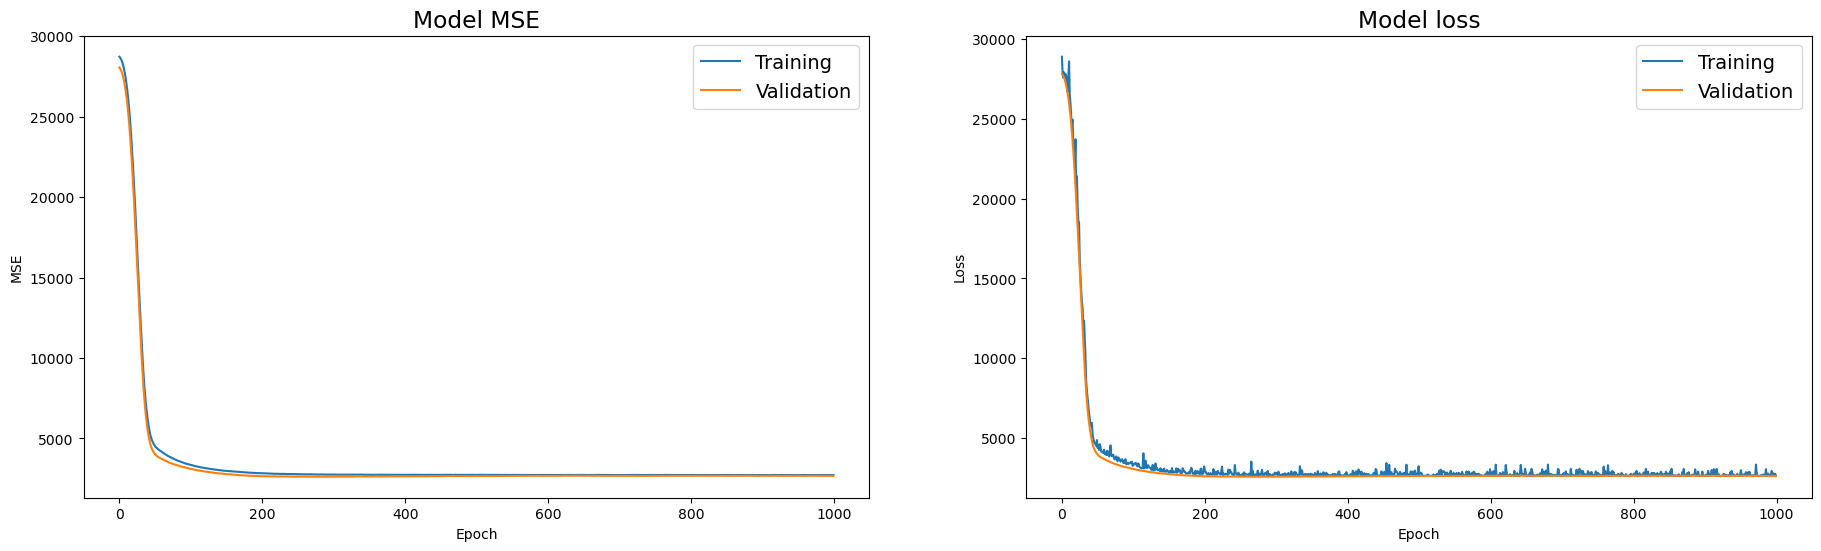

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [24]:
# insert code here
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

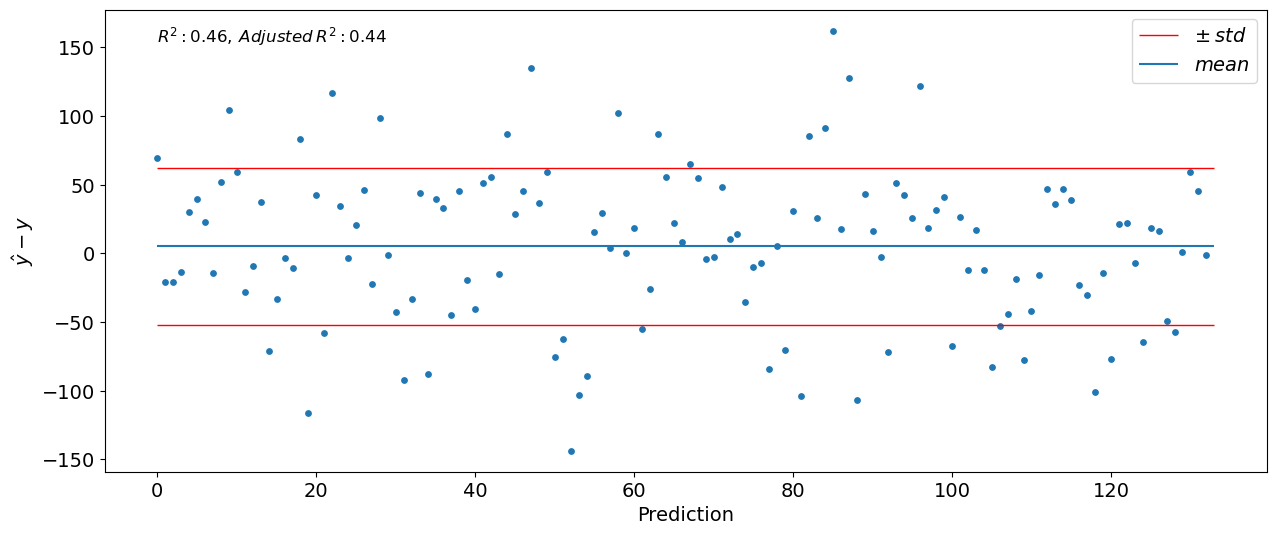

In [25]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



